In [24]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import seaborn as sns

In [6]:
Sharks = pd.read_csv('attack_clean.csv')

 The probability of been a fatal Shark attack, is higher on women


In [5]:
pd.set_option('display.max_columns', None)
Sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,month,Clean_Hours
0,2018.06.25,25-Jun-2018,2018.0,Sea Disaster,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,No injury,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,jun,18.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,jun,14.0
2,2018.06.09,09-Jun-2018,2018.0,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Foot bitten,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,jun,7.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Foot bitten,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,jun,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,FATAL,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,jun,NaN


In [8]:

Sharks["Fatal (Y/N)"].value_counts()

UNKNOWN    20033
N           4301
Y           1389
Name: Fatal (Y/N), dtype: int64

In [9]:
filtro = Sharks.loc[(Sharks["Sex"] != '0') & (Sharks["Fatal (Y/N)"] != '0') , ["Sex", "Fatal (Y/N)"]]
filtro.value_counts()

Sex      Fatal (Y/N)
Unknown  UNKNOWN        19530
M        N               3483
         Y               1174
F        N                468
M        UNKNOWN          441
Unknown  N                350
         Y                108
F        Y                107
         UNKNOWN           62
dtype: int64

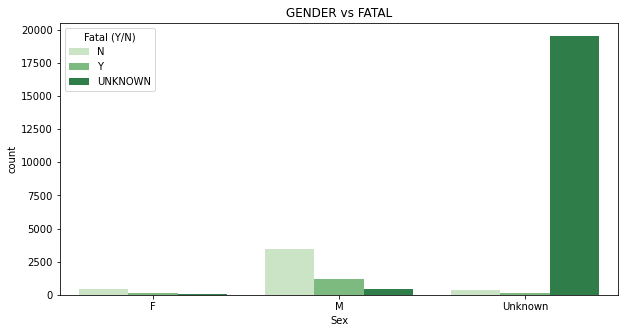

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax1 = sns.countplot(x='Sex', hue='Fatal (Y/N)', data=filtro, palette="Greens").set_title('GENDER vs FATAL')

In [11]:
ax1.figure.savefig("GENDER_vs_Mortal.svg")

Have been reported more shark attacks with people between the ages of 15 and 35.


In [12]:
Sharks["Age"].value_counts()

0     22282
17      156
18      153
20      151
19      143
      ...  
86        1
87        1
82        1
84        1
72        1
Name: Age, Length: 82, dtype: int64

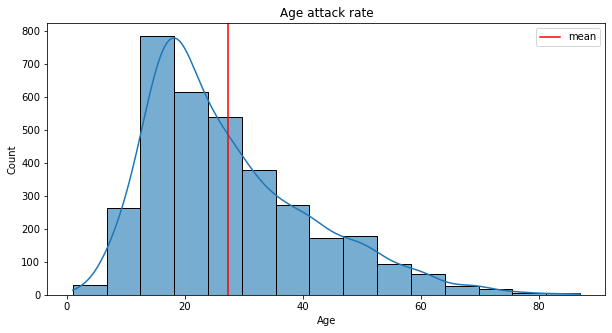

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Age attack rate')
plot = sns.histplot(x= Sharks.Age.loc[(Sharks["Age"] != 0)], bins=15, kde=True, alpha=0.6)
plot.axvline(x=Sharks.Age.loc[(Sharks["Age"] != 0)].mean(), c="red", label="mean")
plt.legend()

In [14]:
plot.figure.savefig("AGE.svg")

The most common shark attacks reported were by white sharks

In [15]:
Sharks['Species'].value_counts()

White shark                                                  163
Shark involvement prior to death was not confirmed           105
Invalid                                                      102
Shark involvement not confirmed                               88
Tiger shark                                                   73
                                                            ... 
A bull shark, according to some of the divers on the boat      1
White shark, 10 '                                              1
2.4 m [8'] whaler shark                                        1
Wobbegong shark, 1.4 m [4.6']                                  1
White shark, 9'                                                1
Name: Species, Length: 1549, dtype: int64

Sharks attacks more often to people that are surfing

In [19]:
Sharks['Activity'].value_counts().head(5)

Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Name: Activity, dtype: int64

In [21]:
Sharks_activity = Sharks['Activity'].loc[(Sharks["Activity"] == 'Paddling') | (Sharks["Activity"] == 'Standing') | (Sharks["Activity"] == 'Surfing') | (Sharks["Activity"] == 'Free diving')]
Sharks_activity

0          Paddling
1          Standing
2           Surfing
3           Surfing
4       Free diving
           ...     
6201        Surfing
6228    Free diving
6249       Standing
6261    Free diving
6276       Standing
Name: Activity, Length: 1102, dtype: object

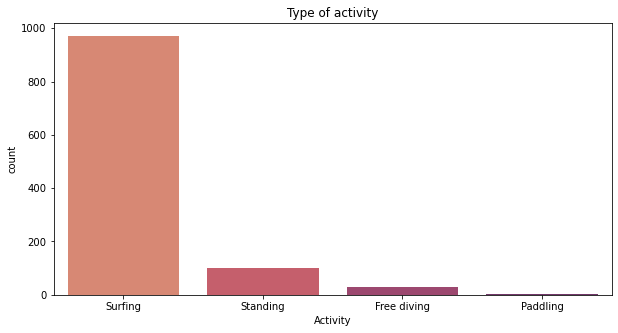

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
ax6 = sns.countplot(x=Sharks_activity, palette='flare', ax=ax, order = Sharks_activity.value_counts().index).set_title('Type of activity')